# DEMO

The demo is intended to understand the idea of generating qiskit

## Prerequisites

Qiskit is posible installing in 64-bit systems:

    -Ubuntu 16.04 or later
    -macOS 10.12.6 or later
    -Windows 7 or later
    
You need to have Python3.5 or higher installed.

The following command install qiskit.

In [ ]:
!pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/home/jovyan/.local/lib/python3.7'
Check the permissions.



In case you need to install in jupyter Notebooks, you need to use the next command

In [ ]:
!pip install qiskit[visualization]

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydot-1.4.1-py2.py3-none-any.whl (19 kB)
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/home/jovyan/.local/lib/python3.7'
Check the permissions.



In [ ]:
!!pip install pylatexenc

['Defaulting to user installation because normal site-packages is not writeable',
 'Requirement already satisfied: pylatexenc in /opt/conda/lib/python3.7/site-packages (2.7)',
 "ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/home/jovyan/.local/lib/python3.7'",
 'Check the permissions.',
 '']

# Introduction
In order to validate that it has been installed correctly the module is called, if it does not send an error it means that you already have Qiskit installed

In [ ]:
import qiskit # call  the qiskit's module 

Qiskit requires three components for the creation of quantum circuits:

    -Qubits or QuantumRegister (the inputs).
    -Classical bits or ClassicalRegister (number of qubits to be measured from the quantum circuit).
    -Quantum circuit or QuantumCircuit (the means to apply quantum gates to the qubits).
    
   
The most basic example is calling a qubit (which conveniently starts at the |0> state) and then measuring it, as shown below.

In [ ]:
qr = qiskit.QuantumRegister(1) # call a quantum bit (or qubit)
cr = qiskit.ClassicalRegister(1) # call a clasical bit
program = qiskit.QuantumCircuit(qr, cr) # The quantum circuit is generated from the previous qubit and bit

The measurement is made at the end of the quantum circuit indicating in list form the qubits that will correspond to the classic bits

In [ ]:
program.measure(qr,cr) # The qubit is measured, and the measurement result is stored in the classic bit.

Qiskit has different ways to visualize the quantum circuit that was designed before.

In [ ]:
program.draw()

┌─┐
q0_0: ┤M├
      └╥┘
c0: 1/═╩═
       0

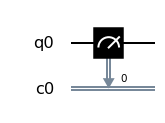

In [ ]:
%matplotlib inline
program.draw(output="mpl")

The quantum circuit simulation process is performed by selecting a backend such as "qasm_simulator"

In [ ]:
job = qiskit.execute( program, qiskit.BasicAer.get_backend('qasm_simulator') )

To obtain the values of the measurement that was made on the quantum circuit is

In [ ]:
print( job.result().get_counts() )

{'0': 1024}


When no modification is made to the qubit, its value will always be the default value which is 0. Another way to identify the output values is from a histogram that displays the total of measurements in the $|0>$ state


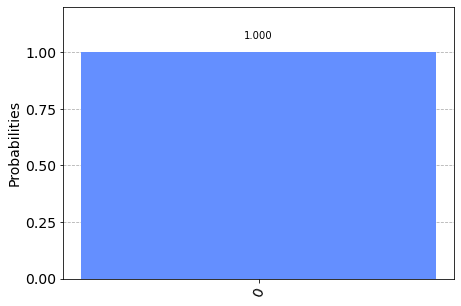

In [ ]:
qiskit.visualization.plot_histogram(job.result().get_counts(program))

Qiskit gives the opportunity to use quantum computers remotely. To access them, you need to have an account at https://quantum-computing.ibm.com, where by checking the section "my account" you will get a token to use a real quantum computer. If you save the account in your local computer, it will be remembered for future cloud executions of Qiskit code for a variety of real quantum computer backends.

In [ ]:
qiskit.IBMQ.save_account('my_token') #Replace the text my_token for your own token

configrc.store_credentials:WARNING:2020-10-11 23:59:01,669: Credentials already present. Set overwrite=True to overwrite.


After having the key saved, use the load method and select a computer (the list can be found at the link https://quantum-computing.ibm.com/). For this example, the ibmq16_melbourne (has 15 qubits) is selected. 

In [ ]:
qiskit.IBMQ.load_account() # load the token
provider = qiskit.IBMQ.get_provider('ibm-q') # select the provider
backend = provider.get_backend('ibmq_16_melbourne') # select the name of the quatum computer to use
print("real device:",backend.name())
job = qiskit.execute( program, backend )

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


real device: ibmq_16_melbourne


In [ ]:
print( job.result().get_counts() ) # show the result

{'0': 1016, '1': 8}


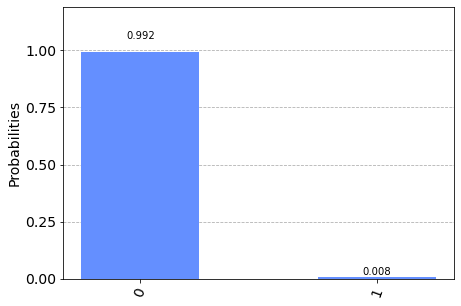

In [ ]:
qiskit.visualization.plot_histogram(job.result().get_counts())

# Single qubit

One way to define the qubit value is from the Statevector method

In [ ]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_label('0') #indicates the state of a qubit
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Show with the method data the state vector is equal to the |0> state

In [ ]:
sv.data

array([1.+0.j, 0.+0.j])

A visual support is from the method of the qsphere that shows the state of the qubits (in this case, one qubit) on a sphere.

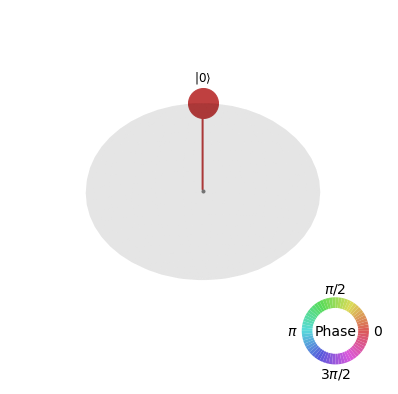

In [ ]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(sv.data)

## Apply X gate
The code below generates a quantum circuit that applies the X gate to the 0th qubit (as qubits in Qiskit are numbered 0, 1, 2,...), and shows the subsequent quantum state in the qsphere. The X gate is also called the NOT gate because in this basis of |0> and |1> (called the computational basis), the X gate flips the bit value of the qubit it is applied to.

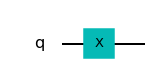

In [ ]:
circuit = qiskit.QuantumCircuit(1)
circuit.x(0)
circuit.draw('mpl')

In [ ]:
sv_x = sv.evolve(circuit)

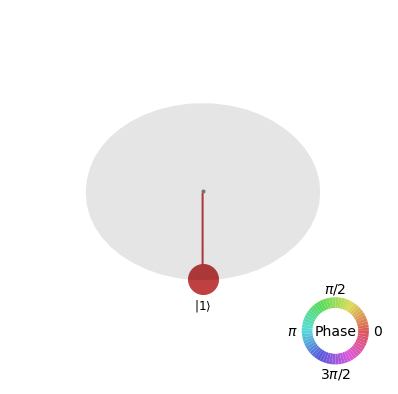

In [ ]:
plot_state_qsphere(sv_x.data)

## Apply Hadamard gate
The code below generates a quantum circuit that applies the Hadamard (H) gate to the 0th qubit, and shows the subsequent quantum state in the qsphere.

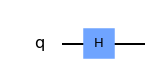

In [ ]:
circuit = qiskit.QuantumCircuit(1)
circuit.h(0)
circuit.draw('mpl')

In [ ]:
sv_h = sv.evolve(circuit)

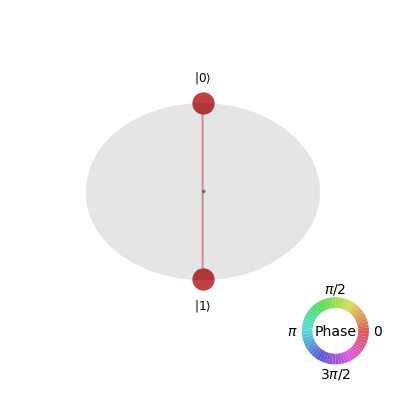

In [ ]:
plot_state_qsphere(sv_h.data)

# Multiple Qubits

For the case of multiple qubits, we can perform quantum entanglement. Here, we entangle two qubits together by applying the Hadamard gate followed by the Controlled-X (CX) gate. The Controlled-X gate is also called the Controlled-NOT (CNOT) gate.

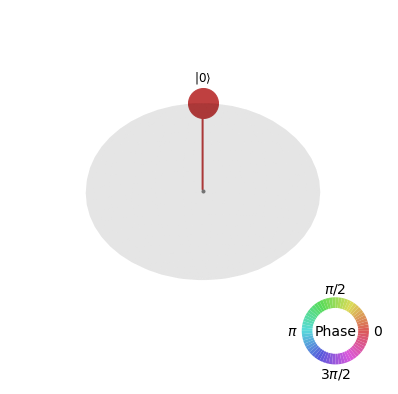

In [ ]:
sv_hcx = Statevector.from_label('00')
plot_state_qsphere(sv.data)

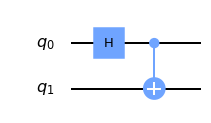

In [ ]:
circuit = qiskit.QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw('mpl')

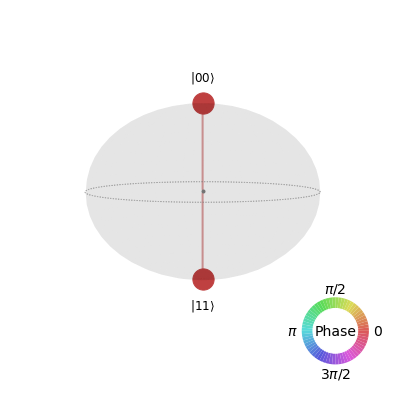

In [ ]:
sv_entanglement = sv_hcx.evolve(circuit)
plot_state_qsphere(sv_entanglement.data)